importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    mean_squared_error,
    r2_score,
    roc_auc_score,
    roc_curve,
    classification_report,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
sns.set()
plt.style.use("ggplot")

loading the data

pimc indian diabetes dataset


In [2]:
# load dataset to pandas dataframe
df = pd.read_csv("/content/pima-indians-diabetes.csv")

In [3]:
# Get the actual column names from the DataFrame
print(df.columns)

Index(['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)'],
      dtype='object')


In [4]:
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Supervised or Unsupervised
# ans: Supervised-> target column
# Regreesion or Classification
# ans: Classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   1. Number of times pregnant                                                  768 non-null    int64  
 1   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   3. Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   4. Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   5. 2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   6. Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   7. Diabetes pedigree function              

In [6]:
df.columns

Index(['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)'],
      dtype='object')

In [7]:
# independent features->'Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Diabetes pedigree function', 'Age'
# dependent features-> outcome

# descriptive statistics of the dataset
df.describe()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# (rows, columns)
df.shape

(768, 9)

In [9]:
# distribution of outcome variables
df['9. Class variable (0 or 1)'].value_counts()*100/len(df)

,count
9. Class variable (0 or 1),
0,65.104167
1,34.895833


<Axes: xlabel='8. Age (years)', ylabel='Count'>

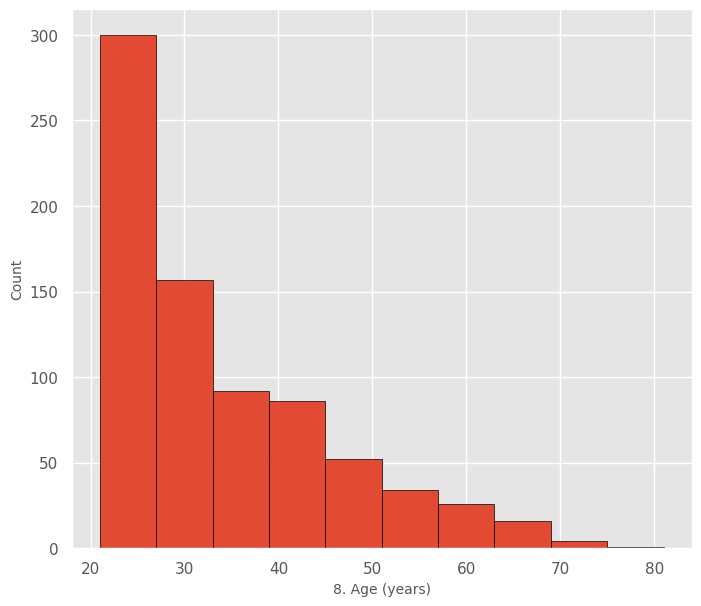

In [10]:
# plot the hist of the age variables
plt.figure(figsize=(8,7))
plt.xlabel('8. Age (years)',fontsize=10)
plt.ylabel('Count',fontsize=10)
df['8. Age (years)'].hist(edgecolor="black")

In [11]:
df['8. Age (years)'].max()

81

In [12]:
df['8. Age (years)'].min()

21

In [13]:
print("MAX AGE: "+str(df['8. Age (years)'].max()))
print("MIN AGE: "+str(df['8. Age (years)'].min()))

MAX AGE: 81
MIN AGE: 21


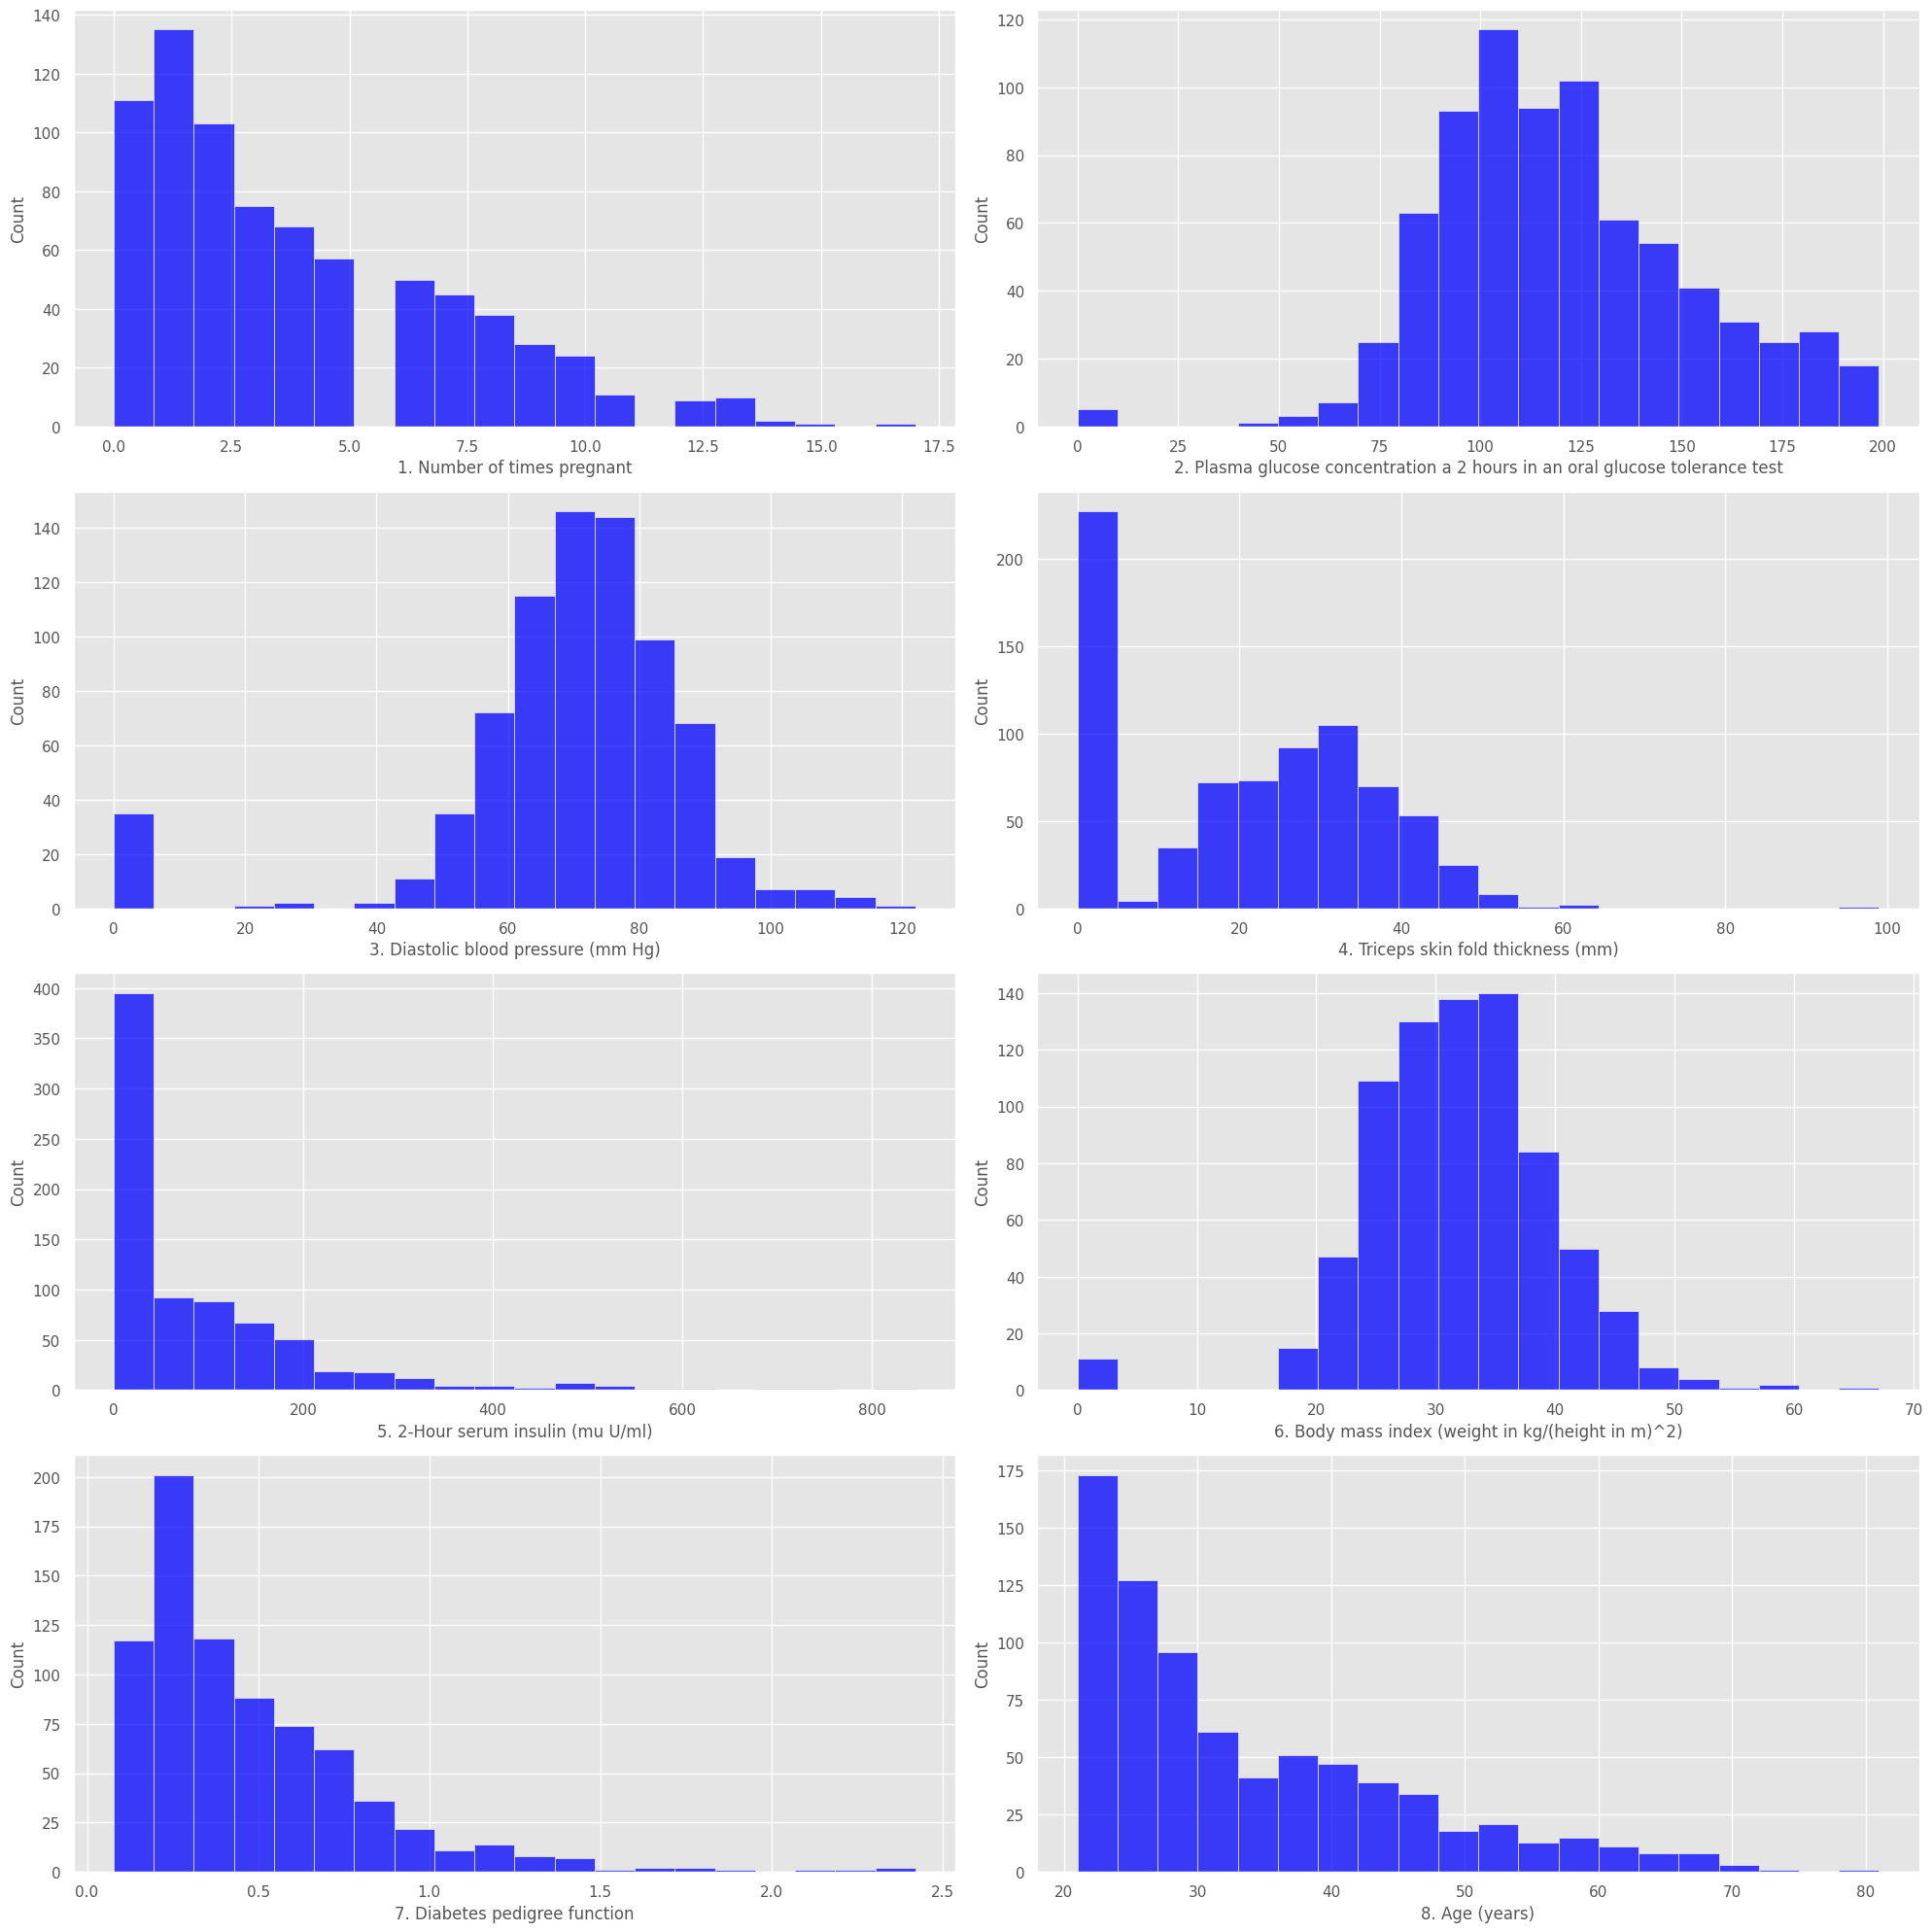

In [14]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.histplot(df['1. Number of times pregnant'], bins=20, ax=ax[0,0], color="blue")
sns.histplot(df['2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'], bins=20, ax=ax[0,1], color="blue")
sns.histplot(df['3. Diastolic blood pressure (mm Hg)'], bins=20, ax=ax[1,0], color="blue")
sns.histplot(df['4. Triceps skin fold thickness (mm)'], bins=20, ax=ax[1,1], color="blue")
sns.histplot(df['5. 2-Hour serum insulin (mu U/ml)'], bins=20, ax=ax[2,0], color="blue")
sns.histplot(df['6. Body mass index (weight in kg/(height in m)^2)'], bins=20, ax=ax[2,1], color="blue")
sns.histplot(df['7. Diabetes pedigree function'], bins=20, ax=ax[3,0], color="blue")
sns.histplot(df['8. Age (years)'], bins=20, ax=ax[3,1], color="blue")

plt.tight_layout()
plt.show()


In [15]:
df.groupby("9. Class variable (0 or 1)").agg({'1. Number of times pregnant':'mean'})

,1. Number of times pregnant
9. Class variable (0 or 1),
0,3.298000
1,4.865672


In [16]:
df.groupby("9. Class variable (0 or 1)").agg({'1. Number of times pregnant':'max'})

,1. Number of times pregnant
9. Class variable (0 or 1),
0,13
1,17


In [17]:
df.groupby("9. Class variable (0 or 1)").agg({'2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'mean'})

,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
9. Class variable (0 or 1),
0,109.980000
1,141.257463


In [18]:
df.groupby("9. Class variable (0 or 1)").agg({'2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'max'})

,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
9. Class variable (0 or 1),
0,197
1,199


In [19]:
df.groupby("9. Class variable (0 or 1)").agg({'3. Diastolic blood pressure (mm Hg)':'mean'})

,3. Diastolic blood pressure (mm Hg)
9. Class variable (0 or 1),
0,68.184000
1,70.824627


In [20]:
df.groupby("9. Class variable (0 or 1)").agg({'3. Diastolic blood pressure (mm Hg)':'max'})

,3. Diastolic blood pressure (mm Hg)
9. Class variable (0 or 1),
0,122
1,114


In [21]:
df.groupby("9. Class variable (0 or 1)").agg({'4. Triceps skin fold thickness (mm)':'mean'})

,4. Triceps skin fold thickness (mm)
9. Class variable (0 or 1),
0,19.664000
1,22.164179


In [22]:
df.groupby("9. Class variable (0 or 1)").agg({'4. Triceps skin fold thickness (mm)':'max'})

,4. Triceps skin fold thickness (mm)
9. Class variable (0 or 1),
0,60
1,99


In [23]:
df.groupby("9. Class variable (0 or 1)").agg({'5. 2-Hour serum insulin (mu U/ml)':'mean'})

,5. 2-Hour serum insulin (mu U/ml)
9. Class variable (0 or 1),
0,68.792000
1,100.335821


In [24]:
df.groupby("9. Class variable (0 or 1)").agg({'5. 2-Hour serum insulin (mu U/ml)':'max'})

,5. 2-Hour serum insulin (mu U/ml)
9. Class variable (0 or 1),
0,744
1,846


In [25]:
df.groupby("9. Class variable (0 or 1)").agg({'6. Body mass index (weight in kg/(height in m)^2)':'mean'})

,6. Body mass index (weight in kg/(height in m)^2)
9. Class variable (0 or 1),
0,30.304200
1,35.142537


In [26]:
df.groupby("9. Class variable (0 or 1)").agg({'6. Body mass index (weight in kg/(height in m)^2)':'max'})

,6. Body mass index (weight in kg/(height in m)^2)
9. Class variable (0 or 1),
0,57.3
1,67.1


In [27]:
df.groupby("9. Class variable (0 or 1)").agg({'7. Diabetes pedigree function':'mean'})

,7. Diabetes pedigree function
9. Class variable (0 or 1),
0,0.429734
1,0.550500


In [28]:
df.groupby("9. Class variable (0 or 1)").agg({'7. Diabetes pedigree function':'max'})

,7. Diabetes pedigree function
9. Class variable (0 or 1),
0,2.329
1,2.420


In [29]:
df.groupby("9. Class variable (0 or 1)").agg({'8. Age (years)':'mean'})

,8. Age (years)
9. Class variable (0 or 1),
0,31.190000
1,37.067164


In [30]:
df.groupby("9. Class variable (0 or 1)").agg({'8. Age (years)':'max'})

,8. Age (years)
9. Class variable (0 or 1),
0,81
1,70


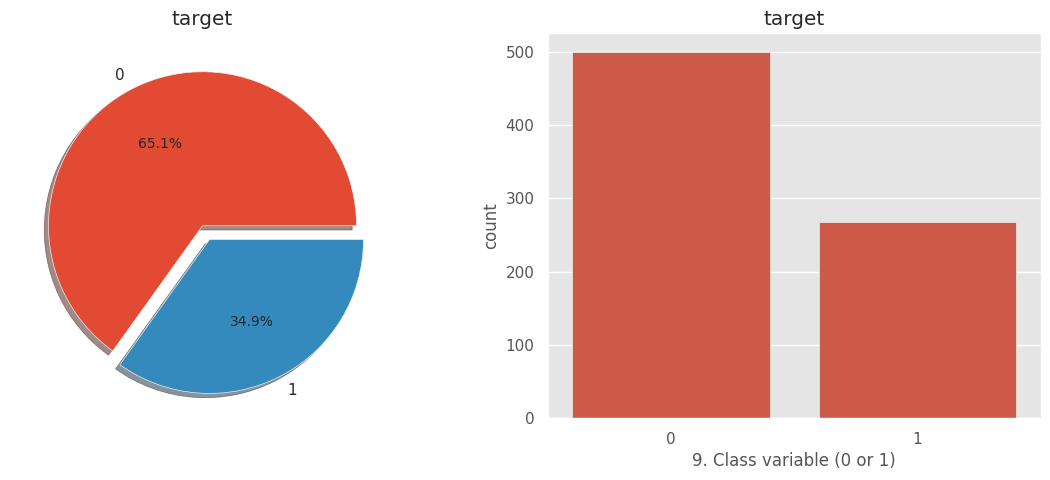

In [31]:
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(14,5))
df['9. Class variable (0 or 1)'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='9. Class variable (0 or 1)', data=df, ax=ax[1])
ax[1].set_title('target')
plt.show()

In [32]:
df.corr()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
1. Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
3. Diastolic blood pressure (mm Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
4. Triceps skin fold thickness (mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
5. 2-Hour serum insulin (mu U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
6. Body mass index (weight in kg/(height in m)^2),0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
7. Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
8. Age (years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
9. Class variable (0 or 1),0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


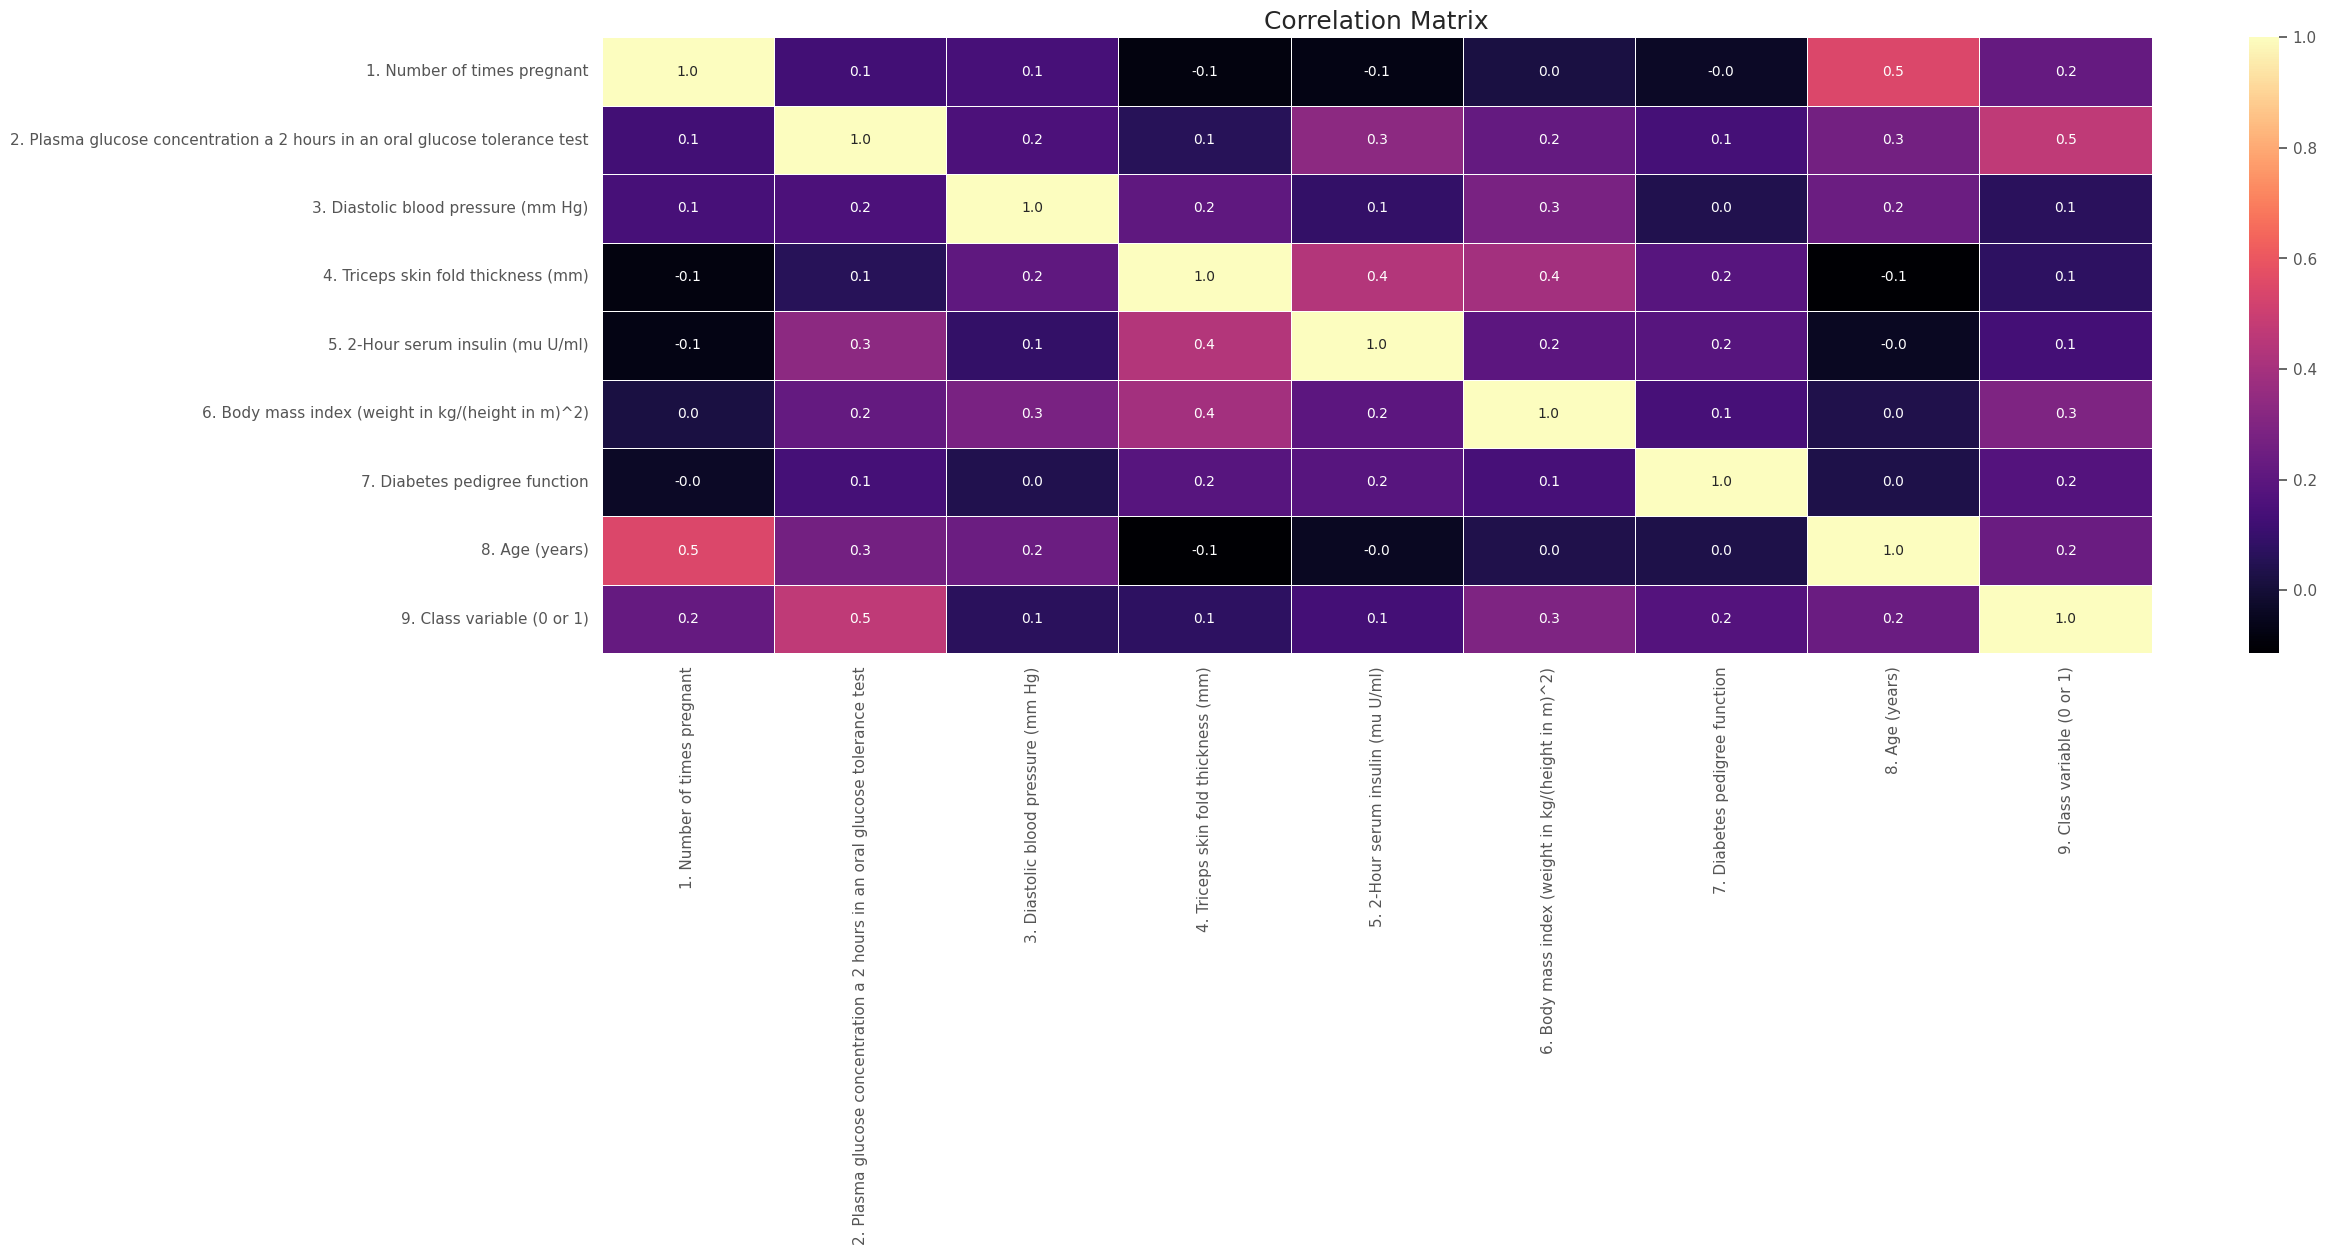

In [33]:
f,ax = plt.subplots(figsize=(25, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=18)
plt.show()

In [34]:
# EDA part completed

In [35]:
df[['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)']] = df[['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)']].replace(0,np.nan)

In [36]:
# Data preprocessing part
df.tail()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0
767,1.0,93.0,70.0,31.0,NaN,30.4,0.315,23,NaN


In [37]:
df.isnull().sum()

,0
1. Number of times pregnant,111
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,5
3. Diastolic blood pressure (mm Hg),35
4. Triceps skin fold thickness (mm),227
5. 2-Hour serum insulin (mu U/ml),374
6. Body mass index (weight in kg/(height in m)^2),11
7. Diabetes pedigree function,0
8. Age (years),0
9. Class variable (0 or 1),500


In [38]:
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


<Axes: >

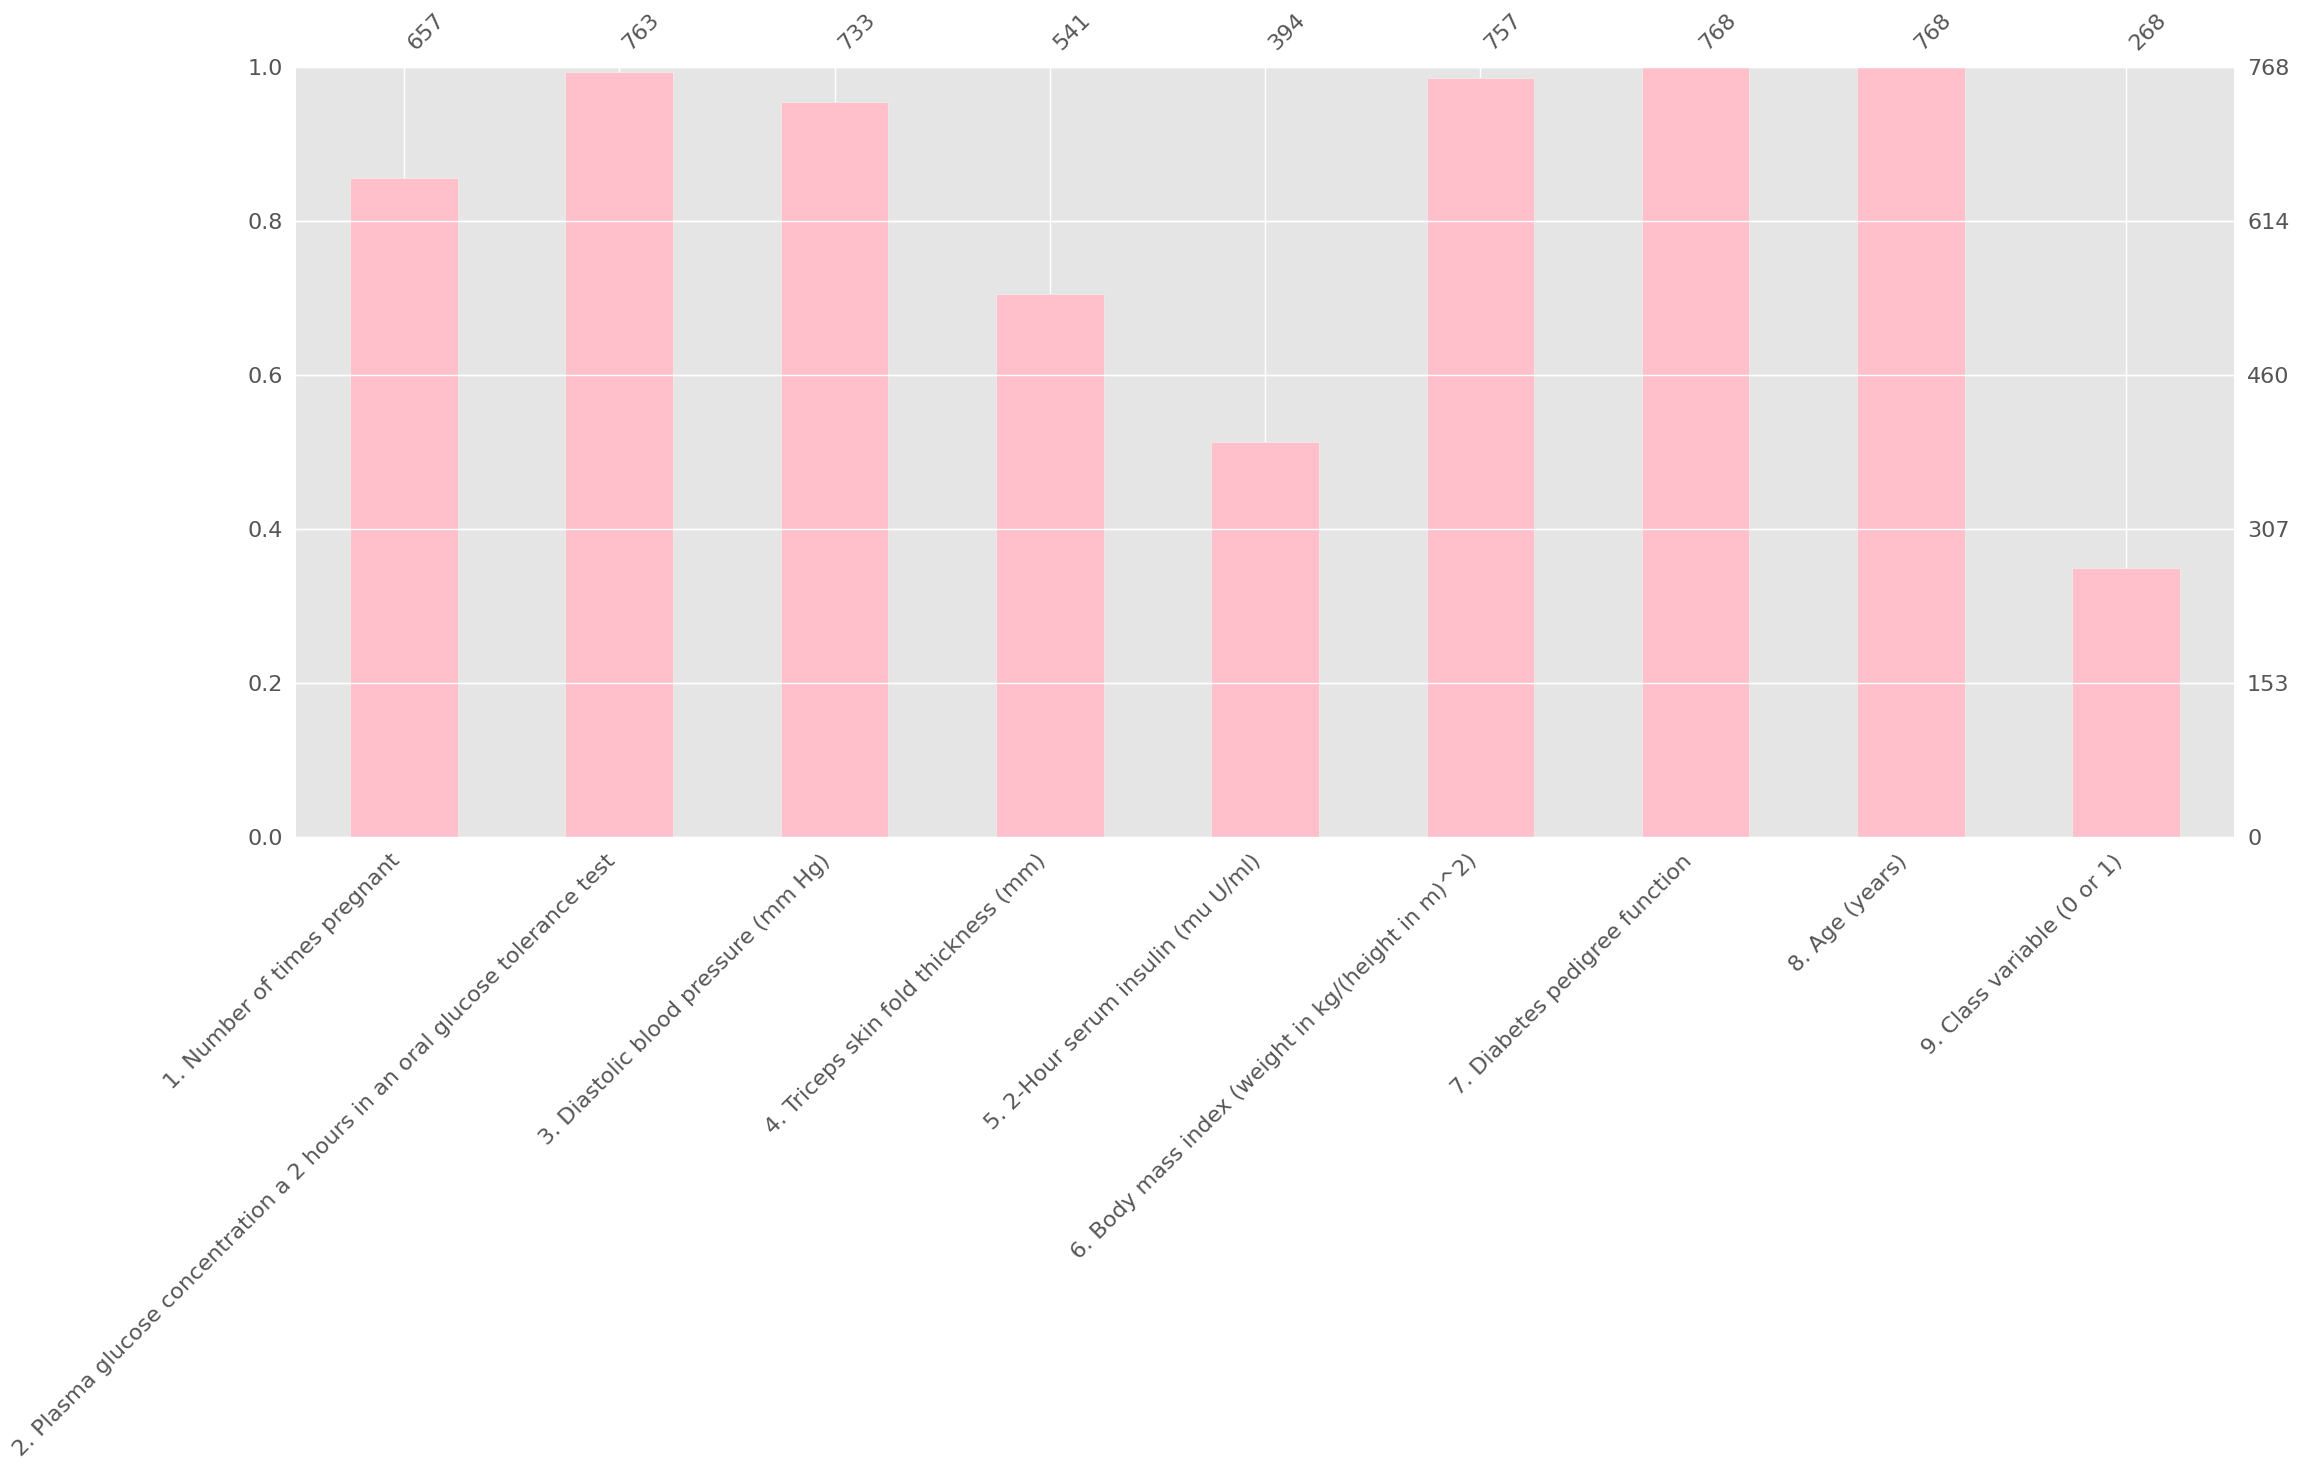

In [39]:
import missingno as msno
msno.bar(df, color="pink")

In [40]:
# median
def median_target(var):
  temp = df[df[var].notnull()]
  temp[[var, '9. Class variable (0 or 1)']].groupby(['9. Class variable (0 or 1)']).median().reset_index()
  return temp

In [42]:
columns = df.columns
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')


In [43]:
for i in columns:
    df[i] = df[i].fillna(df.groupby('9. Class variable (0 or 1)')[i].transform('median'))

In [44]:
print(df[df.isnull().any(axis=1)])  # View rows with any missing values


     1. Number of times pregnant  \
1                            1.0   
3                            1.0   
5                            5.0   
7                           10.0   
10                           4.0   
..                           ...   
762                          9.0   
763                         10.0   
764                          2.0   
765                          5.0   
767                          1.0   

     2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
1                                                 85.0                             
3                                                 89.0                             
5                                                116.0                             
7                                                115.0                             
10                                               110.0                             
..                                                 ...         

In [45]:
cols_with_invalid_zeros = ['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)' ]

for col in cols_with_invalid_zeros:
    df[col] = df[col].replace(0, np.nan)


In [46]:
# Show total missing values in each column
print(df.isnull().sum())

# Optional: Show rows that contain any missing value
print(df[df.isnull().any(axis=1)])


1. Number of times pregnant                                                     73
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      3
3. Diastolic blood pressure (mm Hg)                                             19
4. Triceps skin fold thickness (mm)                                            139
5. 2-Hour serum insulin (mu U/ml)                                              236
6. Body mass index (weight in kg/(height in m)^2)                                9
7. Diabetes pedigree function                                                    0
8. Age (years)                                                                   0
9. Class variable (0 or 1)                                                     500
dtype: int64
     1. Number of times pregnant  \
1                            1.0   
3                            1.0   
5                            5.0   
7                           10.0   
10                           4.0   
..                      

In [47]:
df.fillna(0, inplace=True)

In [48]:
df.isnull().sum()

,0
1. Number of times pregnant,0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0
3. Diastolic blood pressure (mm Hg),0
4. Triceps skin fold thickness (mm),0
5. 2-Hour serum insulin (mu U/ml),0
6. Body mass index (weight in kg/(height in m)^2),0
7. Diabetes pedigree function,0
8. Age (years),0
9. Class variable (0 or 1),0


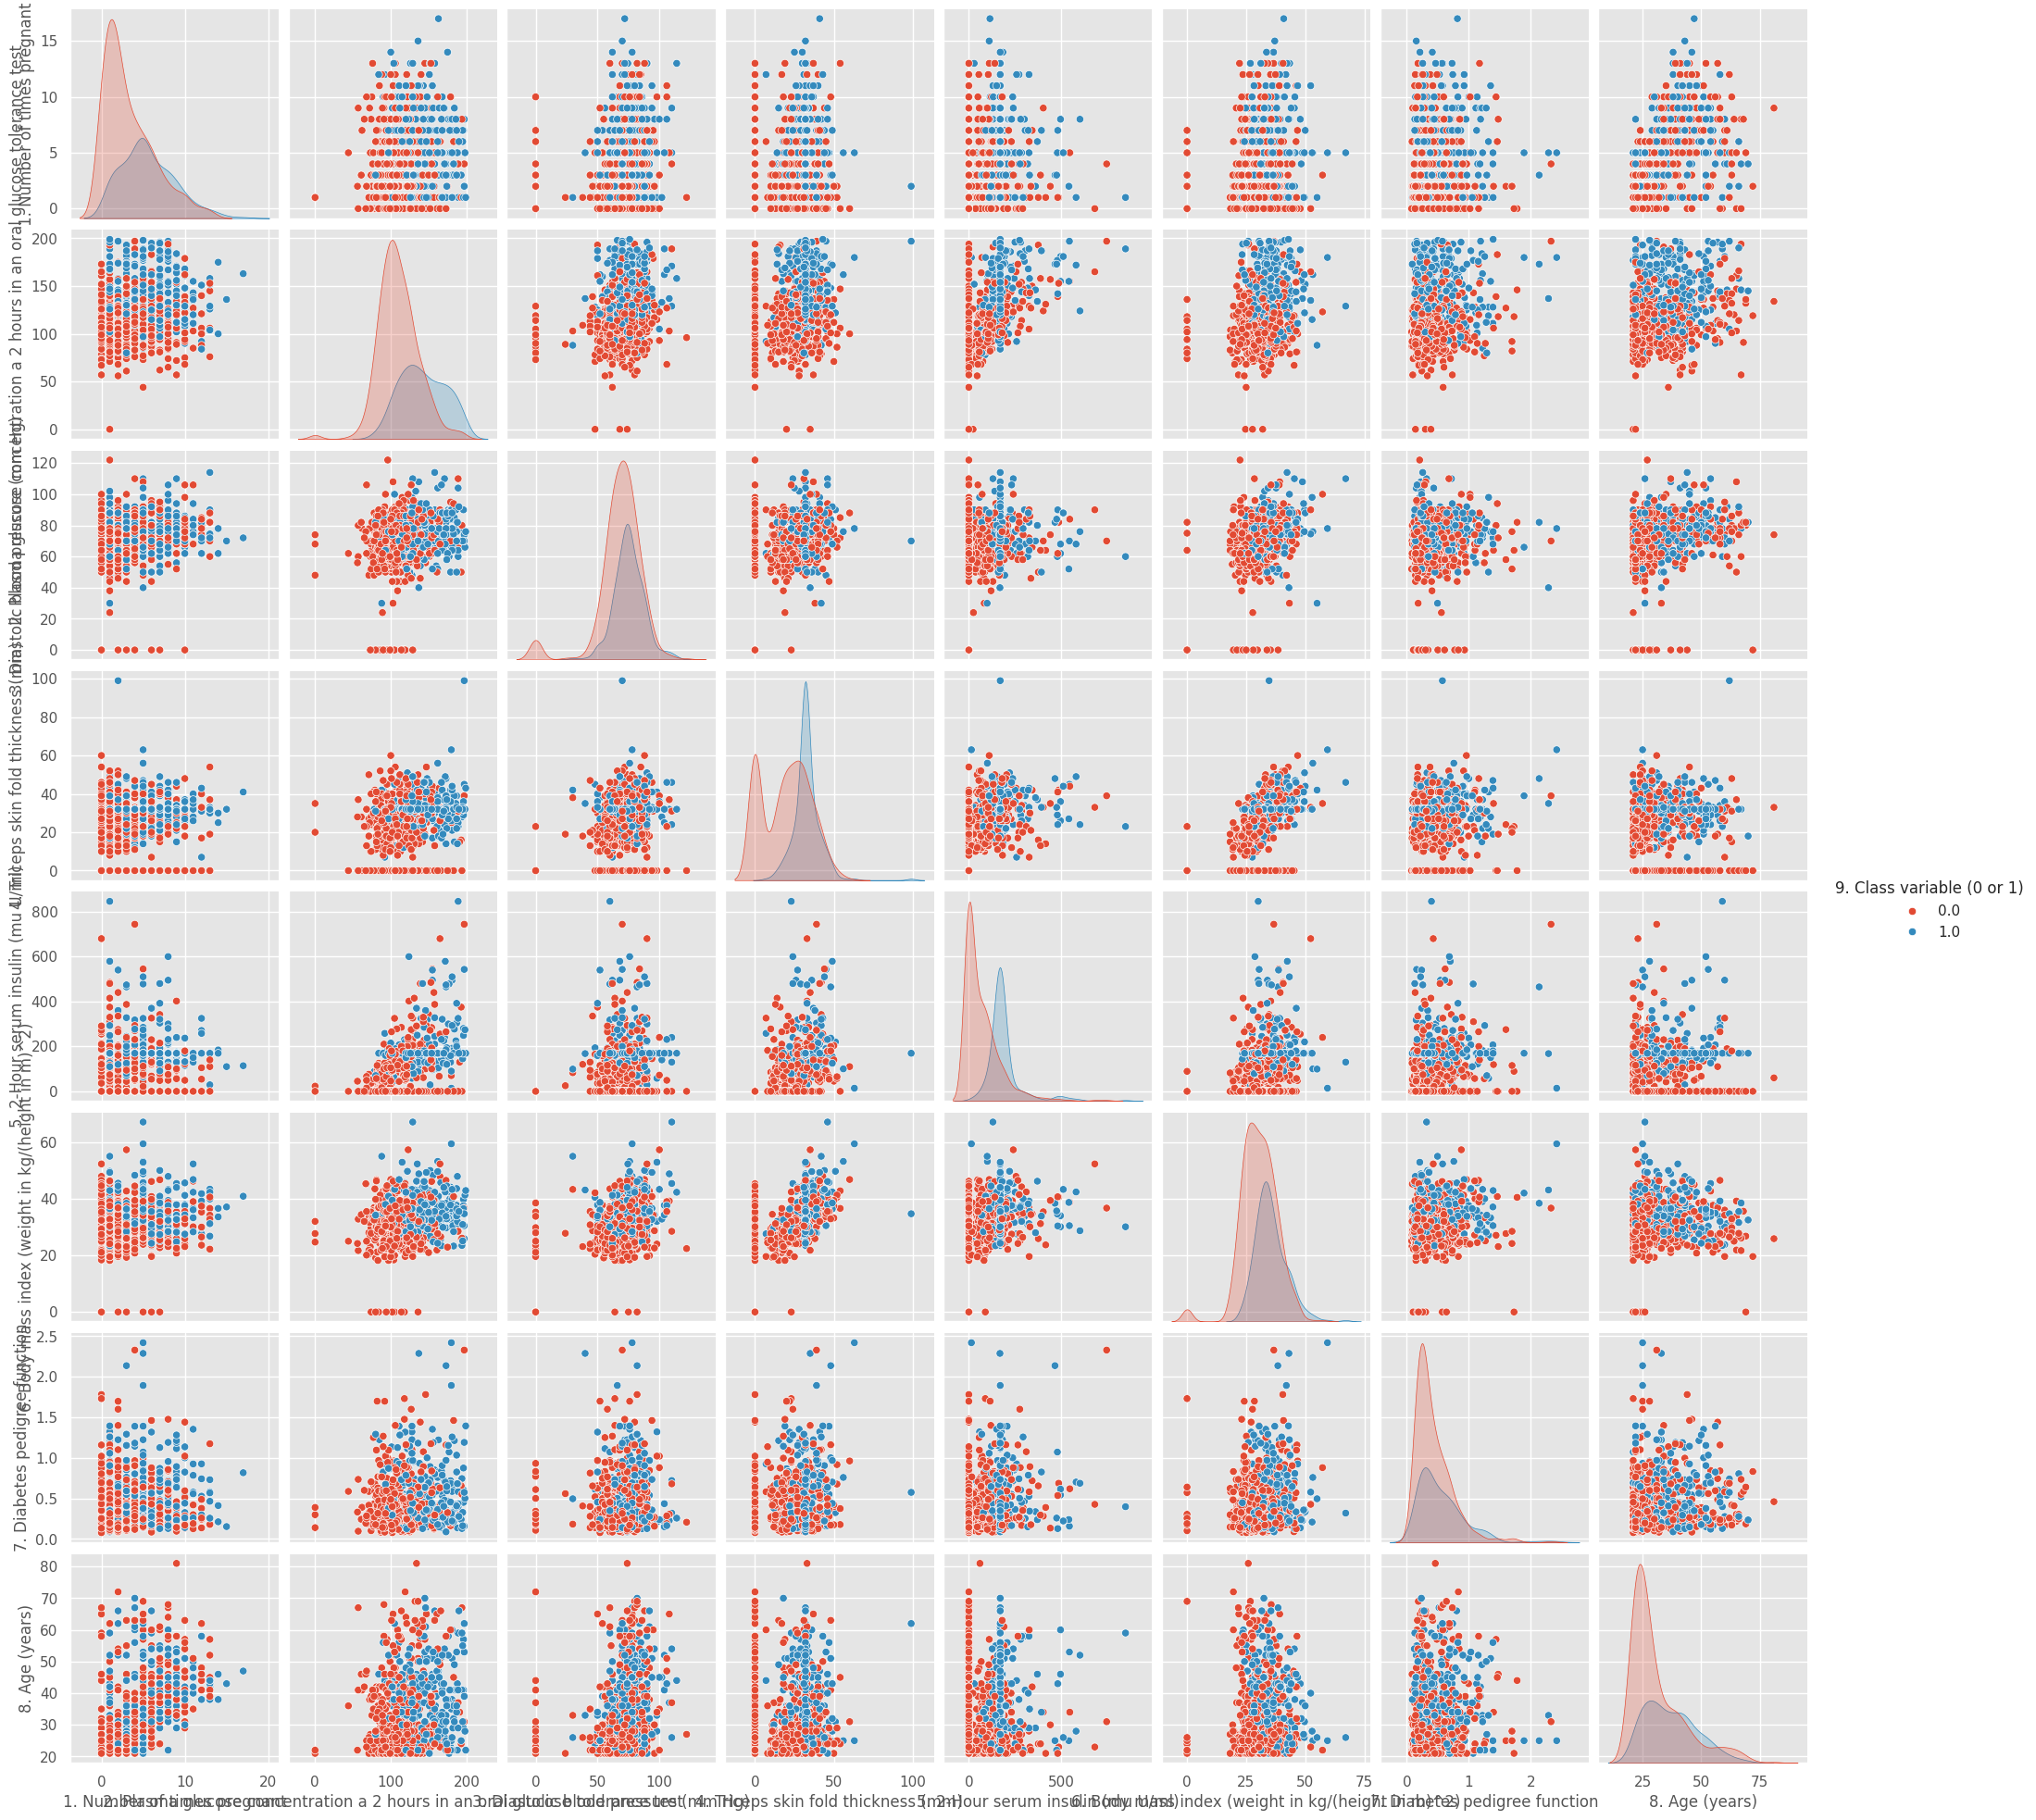

In [49]:
# pair plot
p = sns.pairplot(df, hue="9. Class variable (0 or 1)")

In [50]:
# outlier Detection
# IQR
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  if df[(df[feature]>upper_bound)].any(axis=None):
    print(feature,"yes")
  else:
    print(feature,"no")


1. Number of times pregnant yes
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test no
3. Diastolic blood pressure (mm Hg) yes
4. Triceps skin fold thickness (mm) yes
5. 2-Hour serum insulin (mu U/ml) yes
6. Body mass index (weight in kg/(height in m)^2) yes
7. Diabetes pedigree function yes
8. Age (years) yes
9. Class variable (0 or 1) no


<Axes: ylabel='5. 2-Hour serum insulin (mu U/ml)'>

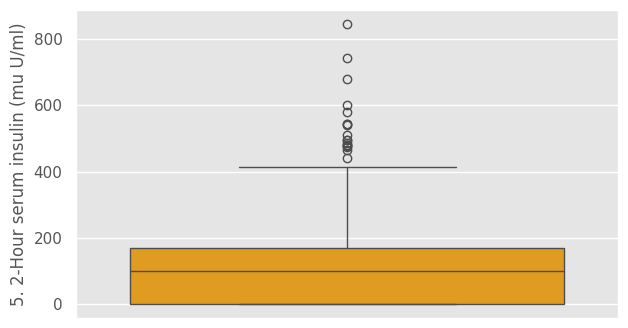

In [51]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df["5. 2-Hour serum insulin (mu U/ml)"],color="orange")

In [52]:
Q1 = df['5. 2-Hour serum insulin (mu U/ml)'].quantile(0.25)
Q3 = df['5. 2-Hour serum insulin (mu U/ml)'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['5. 2-Hour serum insulin (mu U/ml)']> upper_bound, '5. 2-Hour serum insulin (mu U/ml)'] = upper_bound

<Axes: ylabel='5. 2-Hour serum insulin (mu U/ml)'>

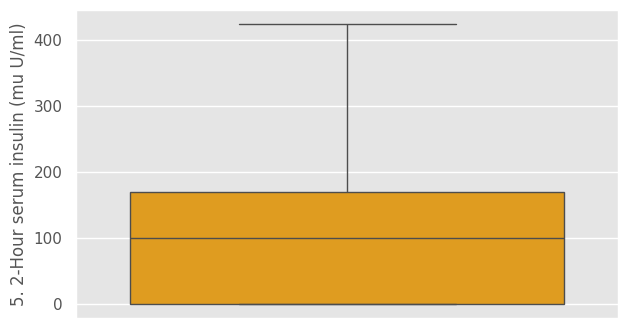

In [53]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df["5. 2-Hour serum insulin (mu U/ml)"],color="orange")

In [55]:
# LOF
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

<Axes: ylabel='1. Number of times pregnant'>

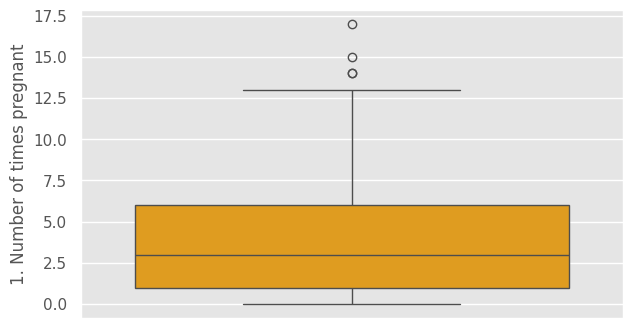

In [56]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df["1. Number of times pregnant"],color="orange")

In [57]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06350828, -2.48584972, -2.35131225, -2.34318981, -2.06586195,
       -1.8901636 , -1.87676801, -1.81447298, -1.79029045, -1.77038199,
       -1.73170186, -1.71804678, -1.68152669, -1.62215678, -1.61187827,
       -1.61175048, -1.59538401, -1.54468552, -1.52971053, -1.51790272])

In [58]:
thresold = np.sort(df_scores)[9]

In [59]:
thresold

np.float64(-1.7703819911006984)

In [60]:
outlier = df_scores>thresold

In [61]:
outlier

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [62]:
# Feature Engineering
NewBMI = pd.Series(["Severe Thinness","Moderate Thinness","Mild Thinness","Normal","Overweight","Obesity","Moderate Obesity","Extreme Obesity"], dtype ="category")

In [63]:
NewBMI

,0
0,Severe Thinness
1,Moderate Thinness
2,Mild Thinness
3,Normal
4,Overweight
5,Obesity
6,Moderate Obesity
7,Extreme Obesity


In [64]:
df['NewBMI'] = NewBMI
df.loc[df['6. Body mass index (weight in kg/(height in m)^2)']<16 , 'NewBMI'] = NewBMI[0]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=16) & (df['6. Body mass index (weight in kg/(height in m)^2)']<17) , 'NewBMI'] = NewBMI[1]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=17) & (df['6. Body mass index (weight in kg/(height in m)^2)']<18.5) , 'NewBMI'] = NewBMI[2]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=18.5) & (df['6. Body mass index (weight in kg/(height in m)^2)']<25) , 'NewBMI'] = NewBMI[3]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=25) & (df['6. Body mass index (weight in kg/(height in m)^2)']<30) , 'NewBMI'] = NewBMI[4]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=30) & (df['6. Body mass index (weight in kg/(height in m)^2)']<35) , 'NewBMI'] = NewBMI[5]
df.loc[(df['6. Body mass index (weight in kg/(height in m)^2)']>=35) & (df['6. Body mass index (weight in kg/(height in m)^2)']<40) , 'NewBMI'] = NewBMI[6]
df.loc[df['6. Body mass index (weight in kg/(height in m)^2)']>=40, 'NewBMI'] = NewBMI[7]

In [65]:
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1),NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1.0,Obesity
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1.0,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,Extreme Obesity


In [66]:
# if insulin>=16 & insuline<=166->normal
def set_insulin(row):
    if row["5. 2-Hour serum insulin (mu U/ml)"] >= 16 and row["5. 2-Hour serum insulin (mu U/ml)"] <= 166:
        return "Normal"
    else:
        return "Abnormal"


In [67]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [68]:
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1),NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1.0,Obesity,Abnormal
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0,Overweight,Abnormal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1.0,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,Extreme Obesity,Abnormal


In [69]:
# some intervals were determined according to the glucose variable and these were assigned categorical
NewGlucose = pd.Series(["Low","Normal","Overweight","Secret","High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] > 70) & (df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] <= 99) , "NewGlucose"] = NewGlucose[1]
df.loc[(df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] > 99) & (df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] <= 126) , "NewGlucose"] = NewGlucose[2]
df.loc[df["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] > 126, "NewGlucose"] = NewGlucose[3]

In [70]:
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1),NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1.0,Obesity,Abnormal,Secret
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0,Overweight,Abnormal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1.0,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,Extreme Obesity,Abnormal,Secret


In [71]:
# One Hot Encoding
pd.get_dummies(df, columns=["NewBMI","NewInsulinScore","NewGlucose"], drop_first=True)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1),NewBMI_Mild Thinness,...,NewBMI_Moderate Thinness,NewBMI_Normal,NewBMI_Obesity,NewBMI_Overweight,NewBMI_Severe Thinness,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1.0,False,...,False,False,True,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0,False,...,False,False,False,True,False,False,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1.0,False,...,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,False,...,False,False,False,True,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0,False,...,False,False,True,False,False,False,False,False,True,False
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0,False,...,False,False,False,False,False,False,False,False,True,False
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0,False,...,False,False,False,True,False,True,False,False,True,False
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1.0,False,...,False,False,True,False,False,False,False,False,True,False


In [72]:
categorical_df = df[['NewBMI','NewInsulinScore', 'NewGlucose']]

In [73]:
categorical_df.head()

,NewBMI,NewInsulinScore,NewGlucose
0,Obesity,Abnormal,Secret
1,Overweight,Abnormal,Normal
2,Normal,Abnormal,Secret
3,Overweight,Normal,Normal
4,Extreme Obesity,Abnormal,Secret


In [74]:
y = df['9. Class variable (0 or 1)']
x = df.drop(['9. Class variable (0 or 1)','NewBMI','NewInsulinScore', 'NewGlucose'], axis=1)

In [75]:
cols = x.columns
index = x.index

In [76]:
x.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years)
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [78]:
from sklearn.preprocessing import RobustScaler
numeric_cols = x.select_dtypes(include=['number']).columns
x_numeric = x[numeric_cols]

# Scale only numeric data
transformer = RobustScaler()
x_scaled = transformer.fit_transform(x_numeric)

# Convert back to DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=numeric_cols, index=x.index)


In [79]:
x.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years)
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [80]:
X = pd.concat([x_scaled, categorical_df], axis=1)

In [81]:
x.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years)
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [90]:
# Machine Learning Algo
# Logistic Regression

In [91]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [148]:
y_pred = log_reg.predict(x_test)


In [149]:
log_reg_acc = accuracy_score(y_train,log_reg.predict(x_train))

In [95]:
accuracy_score(y_test,log_reg.predict(x_test))

0.8701298701298701

In [96]:
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [ 7, 40]])

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       107
         1.0       0.75      0.85      0.80        47

    accuracy                           0.87       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.88      0.87      0.87       154



In [98]:
# KNN

In [150]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_train,knn.predict(x_train))
knn_acc = accuracy_score(y_test,knn.predict(x_test))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       107
         1.0       0.68      0.83      0.75        47

    accuracy                           0.83       154
   macro avg       0.80      0.83      0.81       154
weighted avg       0.85      0.83      0.84       154



In [106]:
# SVM
svc = SVC(probability=True)
parameter ={
    "gamma":[0.0001,0.001,0.01,0.1],
    "C":[0.001,0.05,0.5,0.01,0.1,1,10,15,20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.05, 0.5, 0.01, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [107]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [108]:
grid_search.best_score_

np.float64(0.8598693855791015)

In [151]:
svc = SVC(C=10, gamma = 0.01, probability = True)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_train,svc.predict(x_train))
svc_acc = accuracy_score(y_test,svc.predict(x_test))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91       107
         1.0       0.76      0.89      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.89      0.88      0.89       154



In [112]:
# Decision Tree

In [152]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
accuracy_score(y_train,DT.predict(x_train))
dt_acc = accuracy_score(y_test,DT.predict(x_test))
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       107
         1.0       0.65      0.72      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154



In [133]:
# hyperparameter tuning of dt
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3,5,7,10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1,2,3,5,7],
    'min_samples_split': [2,3,5,7],
    'max_features': ['sqrt','log2']
}
grid_search_dt = GridSearchCV(DT,grid_param,cv=50,n_jobs=-1,verbose=1)
grid_search_dt.fit(x_train,y_train)

Fitting 50 folds for each of 640 candidates, totalling 32000 fits


GridSearchCV(cv=50,
             estimator=DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                                              min_samples_leaf=5,
                                              min_samples_split=7),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [118]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'best'}

In [119]:
grid_search_dt.best_score_

np.float64(0.8661538461538462)

In [120]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(x_test)
print(accuracy_score(y_train,DT.predict(x_train)))
print(accuracy_score(y_test,DT.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9022801302931596
0.8311688311688312
[[95 12]
 [14 33]]
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       107
         1.0       0.73      0.70      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [121]:
# Random Forest

In [131]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth= 15, max_features= 0.75, min_samples_leaf = 2, min_samples_split= 3, n_estimators= 130 )
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [132]:
y_pred = rand_clf.predict(x_test)

In [134]:
y_pred = rand_clf.predict(x_test)
print(accuracy_score(y_train,rand_clf.predict(x_train)))
rand_acc = accuracy_score(y_test,rand_clf.predict(x_test))
print(accuracy_score(y_test,rand_clf.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.993485342019544
0.9090909090909091
[[98  9]
 [ 5 42]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       107
         1.0       0.82      0.89      0.86        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154



In [135]:
# GradientBoostingClassifier

In [137]:
gbc = GradientBoostingClassifier()
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv=10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [138]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [139]:
grid_search_gbc.best_score_

np.float64(0.890772078265468)

In [140]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [143]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8143322475570033
0.8181818181818182
[[102   5]
 [ 23  24]]
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       107
         1.0       0.83      0.51      0.63        47

    accuracy                           0.82       154
   macro avg       0.82      0.73      0.76       154
weighted avg       0.82      0.82      0.80       154



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [144]:
# XGB Classifier

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [146]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9788273615635179
0.9285714285714286
[[101   6]
 [  5  42]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       107
         1.0       0.88      0.89      0.88        47

    accuracy                           0.93       154
   macro avg       0.91      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



In [153]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,92.86
4,Random Forest Classifier,90.91
2,SVM,88.31
0,Logistic Regression,84.69
1,KNN,83.12
5,Gradient Boosting Classifier,81.82
3,Decision Tree Classifier,79.87


In [154]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

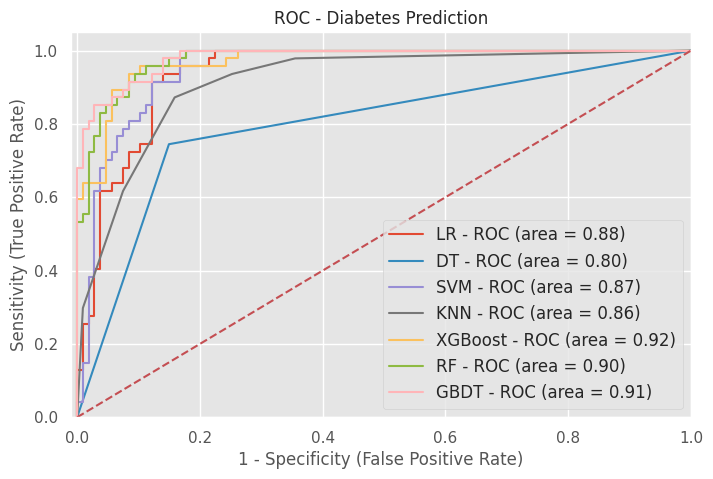

In [155]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[84.69, 79.86999999999999, 88.31, 83.12, 92.86, 90.91, 81.82000000000001]
[np.float64(87.53999999999999), np.float64(78.36), np.float64(86.95), np.float64(85.67), np.float64(91.88), np.float64(90.01), np.float64(90.94)]


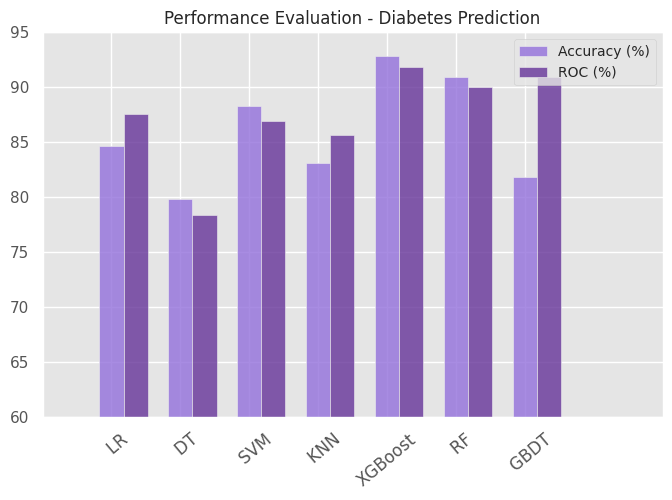

In [156]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()